# Time Series - III (MA Models)

Moving average models are very similar to Auto regressive models, difference being that instead of using past observations of the time series, we try to estimate the value using past error terms.

\begin{align}
x_{t} &= w_{t} + \beta_{1}.w_{t-1} + \beta_{2}.w_{t-2} +   .. 
\end{align}

In the above equation, x is the value of the time series that we want to estimate, $w_{t}$ are the error terms of the previous values, which is assumed to be normally distributed since it is white noise and betas are the coefficients. In this, we will try to explain the time series values using the previous noise terms.

For MA(q) models, ACF should be zero for lags > q by definition.

In [1]:
#Importing the required packages

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Defining a function to visualize and analyze the time series 

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    '''
    Prepares a (3,2) dimensional plot for the visualization of time series values, autocorrelation and partial 
    autocorrelation plots and QQ and probability plots for comparision with normal distribution.
    
    Args:
    y: time series values
    lags: How many lagging values are to be considered.
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)

        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

**Simulating MA(1) process using beta = 0.6 and specifying the AR(p) alpha = 0 **

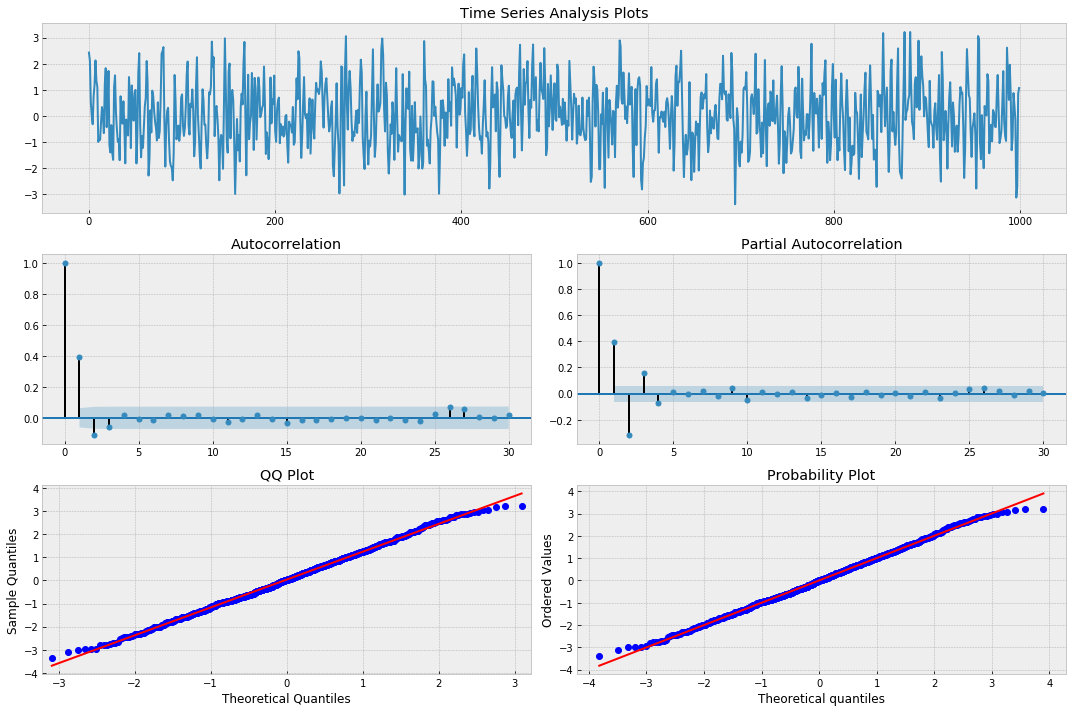

In [3]:
n = int(1000)

#Setting AR(p) alphas = 0
alphas = np.array([0.])
betas = np.array([0.6])

#Adding zero-lag and negating alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma1 = smt.arma_generate_sample(ar = ar, ma = ma, nsample = n)
#print(ma1.shape)
_ = tsplot(ma1, lags = 30)

Since this is a first order model, i.e, q = 1, there is a peak at lag 1 in ACF plot and rest of the peaks are insignificant.  By looking at the ACF of the series we can see how many sequential non zero lags exist. If there are q such lags then we can say that MA(q) model fits well at the data. 
This is similar to looking at the PACF plot for AR(p) models.

The above plot shows that MA(1) model could be an appropriate fit for the series.

**Fitting a MA(1) model on the above simulated data. **

In [4]:
max_lag = 30
model = smt.ARMA(ma1, order = (0,1)).fit(maxlag = max_lag, 
                                        method = 'mle',
                                        trend = 'nc')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1459.048
Method:                           mle   S.D. of innovations              1.041
Date:                Sat, 23 Jun 2018   AIC                           2922.095
Time:                        02:01:19   BIC                           2931.911
Sample:                             0   HQIC                          2925.826
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6090      0.025     24.219      0.000       0.560       0.658
                                    Roots                                    
                  Real          Imaginary           M

The lag coefficient as calculated by the model is 0.67 which is very close to real value 0.6

In [5]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(model.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

The residuals seem normally distributed.


**Simulating and fitting a MA(3) process to obtain the correct betas where betas1,2,3 are equal to 0.3, 0.2 and 0.1.**

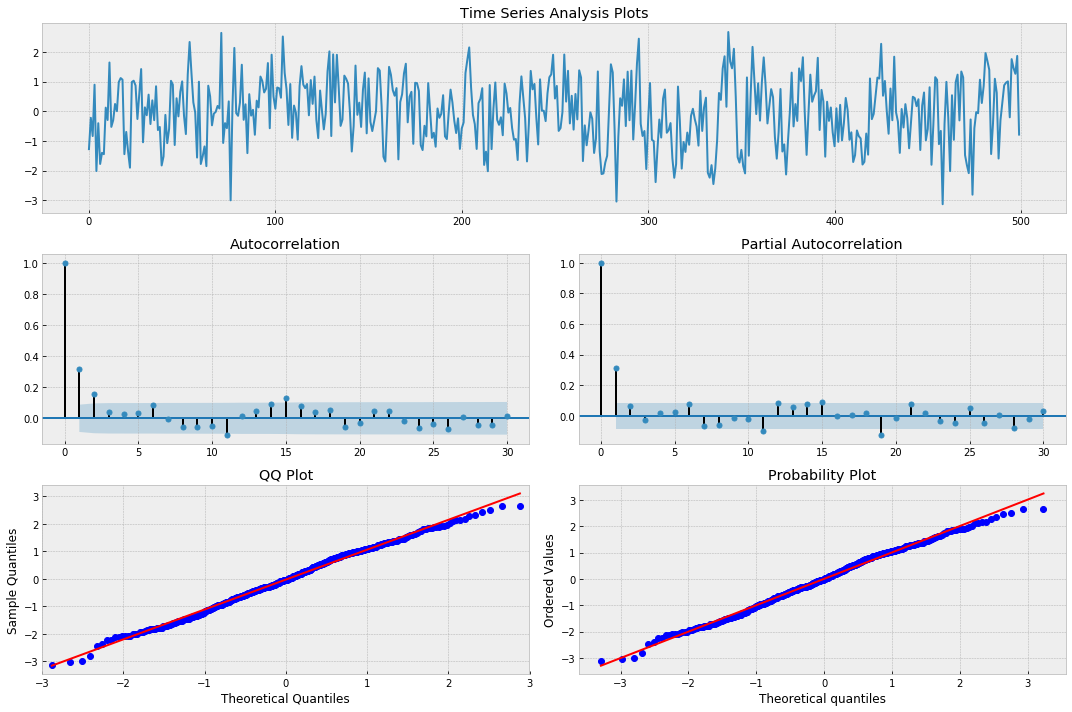

In [6]:
#We should be expecting peaks at lag 1,2,3 and the insignificant peaks beyond 3 lags in ACF plot

n = int(500)
alphas = np.array([0.])
betas = np.array([0.3, 0.2, 0.1])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar = ar, ma = ma, nsample = n)
#print(ma3.shape)
_ = tsplot(ma3, lags = 30)

**Fitting the MA(3) simulated time series **

In [7]:
max_lag = 30
model = smt.ARMA(ma3, order=(0, 3)).fit(maxlag=max_lag, 
                                        method='mle', 
                                        trend='nc')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(0, 3)   Log Likelihood                -724.881
Method:                           mle   S.D. of innovations              1.031
Date:                Sat, 23 Jun 2018   AIC                           1457.762
Time:                        02:01:21   BIC                           1474.621
Sample:                             0   HQIC                          1464.377
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.2972      0.045      6.647      0.000       0.210       0.385
ma.L2.y        0.1626      0.047      3.447      0.001       0.070       0.255
ma.L3.y        0.0358      0.042      0.855      0.3

In [8]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(model.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

We have reason to suspect the residuals are not normally distributed.


The model was roughly able to calculate the coefficients of errors 

## Application - Fitting a MA(1) model on Tesla log returns

In this section, we apply the above technique to fit a MA(1) model on the log returns of TSLA (Tesla Inc.) stock data and see how good can we explain the changes. We use last 5 years EOD stock price data of the TSLA stock which could be downloaded from Yahoo Finance.

In [9]:
#Downloading the data from the directory

tsla_market_data = pd.read_csv("C:\\Users\ku.kulshrestha\Downloads\TSLA.csv")
print(tsla_market_data.head(5))

         Date        Open        High         Low       Close   Adj Close  \
0  2013-06-20  104.650002  107.129997   99.449997  100.650002  100.650002   
1  2013-06-21  103.699997  103.699997   97.500000   99.550003   99.550003   
2  2013-06-24   96.500000  102.870003   95.300003  101.489998  101.489998   
3  2013-06-25  103.099998  104.199997  100.550003  102.400002  102.400002   
4  2013-06-26  103.800003  105.870003  102.660004  105.720001  105.720001   

     Volume  
0  10106500  
1  11718600  
2   7119800  
3   5848700  
4   6602600  


Since we would only be dealing with the price at the end of the day, hence we only need to take care about Close column of the above dataset and then calculate the log returns of the closing price.

In [10]:
tsla_ts_data = tsla_market_data[['Date', 'Close']]

#Adding a new col in the dataframe
tsla_ts_data['Log_return'] = np.nan
tsla_ts_data.head()
for i in range(1, len(tsla_ts_data)):
    tsla_ts_data.loc[i, 'Log_return'] = np.log(np.divide(tsla_ts_data.loc[i,'Close'], tsla_ts_data.loc[i-1, 'Close'])) 

#removing the first row as Log_return cannot be defined for it
tsla_ts_data = tsla_ts_data.dropna()
tsla_ts_data.head()

,Date,Close,Log_return
1,2013-06-21,99.550003,-0.010989
2,2013-06-24,101.489998,0.019300
3,2013-06-25,102.400002,0.008926
4,2013-06-26,105.720001,0.031907
5,2013-06-27,109.250000,0.032845


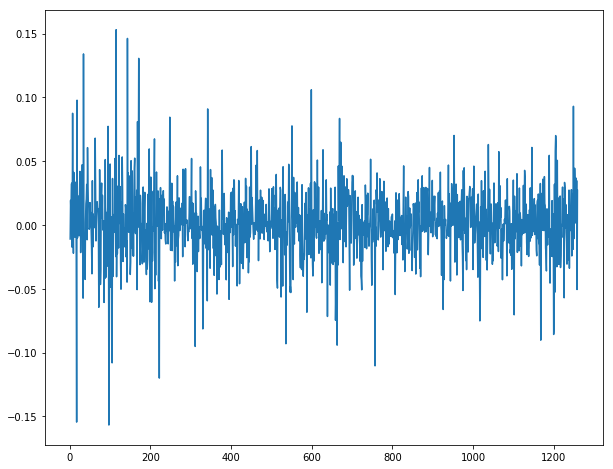

In [11]:
#Plotting the distribution of the log returns
tsla_ts_data.Log_return.plot(figsize = (10,8))

Now we have our data ready, we will fit a simple MA(1) model on the Log_return data.

                              ARMA Model Results                              
Dep. Variable:             Log_return   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood                2717.502
Method:                           mle   S.D. of innovations              0.028
Date:                Sat, 23 Jun 2018   AIC                          -5431.005
Time:                        02:02:16   BIC                          -5420.728
Sample:                             0   HQIC                         -5427.143
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ma.L1.Log_return     0.0042      0.028      0.147      0.883      -0.051       0.060
                                    Roots                                    
                  Real          Ima

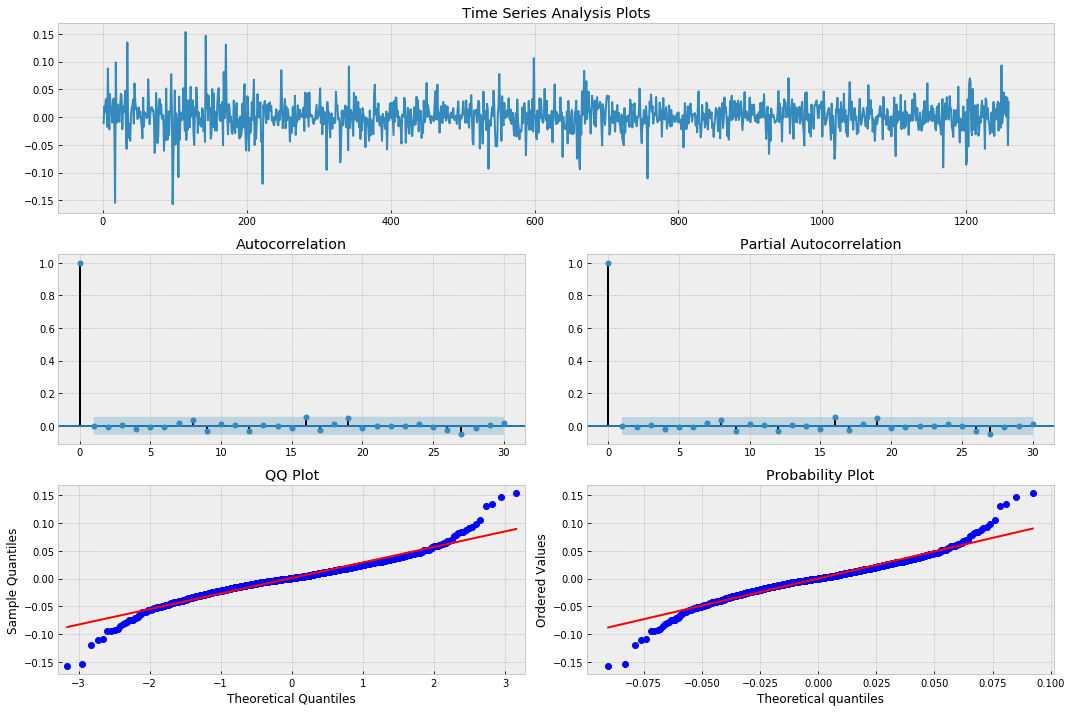

In [12]:
# Fitting a MA(1) model on the TSLA log returns

max_lag = 30
model = smt.ARMA(tsla_ts_data.Log_return, order = (0,1)).fit(maxlag = max_lag,
                                                            method = 'mle',
                                                            trend = 'nc')
print(model.summary())
_ = tsplot(model.resid, lags = max_lag)

We can see some peaks in ACF plot at k = 8,9,12,16,19. Trying MA(2) now.

                              ARMA Model Results                              
Dep. Variable:             Log_return   No. Observations:                 1259
Model:                     ARMA(0, 2)   Log Likelihood                2717.513
Method:                           mle   S.D. of innovations              0.028
Date:                Sat, 23 Jun 2018   AIC                          -5429.027
Time:                        02:02:17   BIC                          -5413.613
Sample:                             0   HQIC                         -5423.234
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ma.L1.Log_return     0.0042      0.028      0.149      0.882      -0.051       0.059
ma.L2.Log_return    -0.0043      0.029     -0.149      0.882      -0.060       0.052
                            

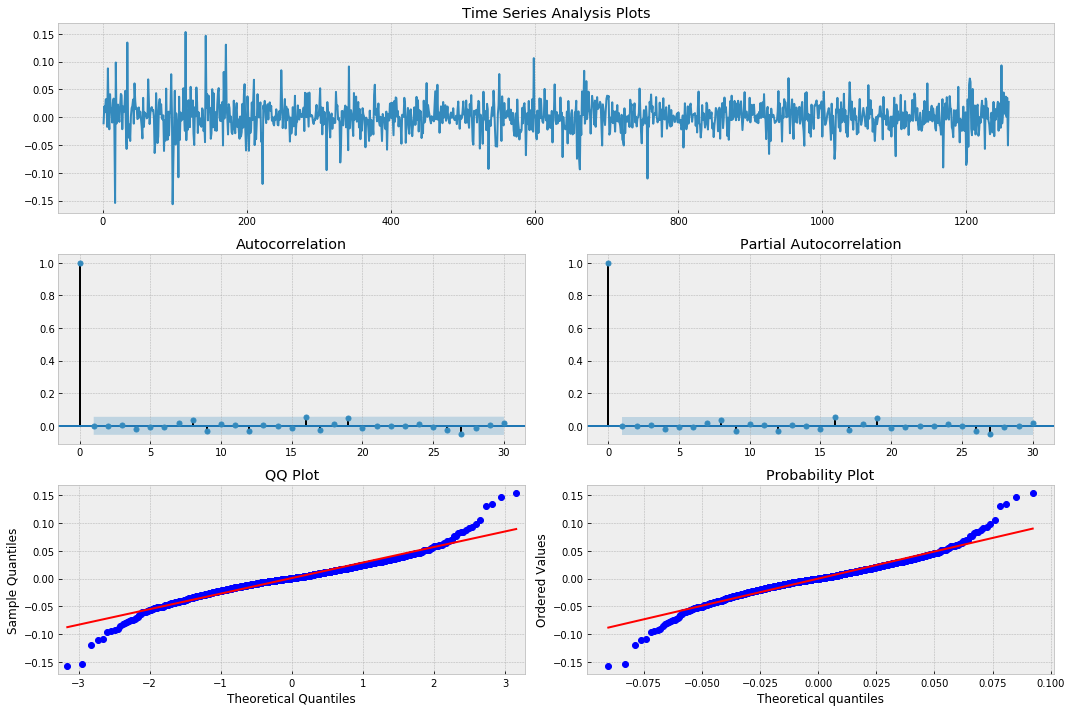

In [13]:
# Fitting MA(2) model on TSLA log returns

model2 = smt.ARMA(tsla_ts_data.Log_return, order = (0,2)).fit(maxlag = max_lag,
                                                             method = 'mle',
                                                             trend = 'nc')

print(model2.summary())
_ = tsplot(model2.resid, lags = max_lag)

We see very marginal peaks at k = 16, 19. This concludes that MA(2) model is capturing a lot of the autocorrelation, but not all long-memory effects. Even if we keep increasing the order of the model, we would still see the peaks because we'll be adding a new parameter to a model that has seemingly explained away much of the correlations at shorter lags, but that won't have much of an effect on the longer term lags. 

It is highly unlikely that a simple MA(q) model explains all the serial correlation for this data.

In [14]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(model2.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

We have reason to suspect the residuals are not normally distributed.


**Conclusion: **

We have analyzed fitting Tesla Log returns to the AR(p) and MA(q) models where p and q are the order of the AR/MQ models respectively. Both of these models are capable in explaining some of the autocorrelation in the residuals. But some long-memory effects still remains and there is still scope of improvement. 